In [51]:
import pandas as pd
import numpy as np

# For data visualization 
import seaborn as sb 
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Importing Datasets 

In [52]:
#120OlympicHistory_AthletesResults

athlete_events = pd.read_csv('../Datasets/120OlympicHistory_AthletesResults_dataset/athlete_events.csv')
regions = pd.read_csv('../Datasets/120OlympicHistory_AthletesResults_dataset/noc_regions.csv')


# 2. Data Exploration - 120 Olympic History

2.1 Exploring athlete_events dataset

In [53]:
#athlete_events.info()

In [54]:
#athlete_events.describe()

# 3.  Data Cleaning

3.1 Check for null values

In [55]:
print(athlete_events.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


Null Values found in Age, Height, Weight and Medals

In [56]:
# Replacing Null VAlues in Medal by No Medal

athlete_events['Medal'].fillna('No Medal', inplace = True)
#print(athlete_events.isnull().sum())

# 4. Merging  athlete_events and regions datasets


4.1 Merging dataset to get a combined set of athlete events and regions.
Complete dataset name "olympics_dataset"

In [57]:
olympics_dataset = pd.merge(athlete_events, regions, on = "NOC", how = "left")
olympics_dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN


4.2 Exploring complete dataset

In [58]:
print("Number of Olympic Seasons Held :", olympics_dataset['Year'].nunique())
print("Number of Countries Participated :", olympics_dataset['NOC'].nunique())
print("Number of Players Participated :", olympics_dataset['Name'].nunique())
print("Number of Sports Conducted :", olympics_dataset['Sport'].nunique())
#print("Number of Medals Won :\n", olympics_dataset['Season'].dropna().value_counts())
print("Number of Medals Won :\n", olympics_dataset['Medal'].dropna().value_counts())

Number of Olympic Seasons Held : 35
Number of Countries Participated : 230
Number of Players Participated : 134732
Number of Sports Conducted : 66
Number of Medals Won :
 No Medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64


# Subset data for  Soviet Union & Russia / Former Soviet States - *Complete Analysis


In [59]:
complete_noc_list = ['URS','EUN','RUS','ARM','MDA','EST','LAT','LTU','GEO','AZE','TJK','KGZ','BLR','UZB','TKM','UKR','KAZ']

#The former Soviet states referenced as OTHERS  are Armenia, Azerbaijan, Belarus, Estonia, Georgia, 
#Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Moldova, Tajikistan, Turkmenistan, Ukraine and Uzbekistan
other_counties_list= ['ARM','MDA','EST','LAT','LTU','GEO','AZE','TJK','KGZ','BLR','UZB','TKM','UKR','KAZ']

In [60]:
#Includes Soviet Union, Russia and other countries part of former USSR -*Added Later
complete_subset_df =olympics_dataset[olympics_dataset['NOC'].isin(complete_noc_list) 
                    & (olympics_dataset['Year'] >= 1956) & (olympics_dataset['Year'] <= 2012)]

# Complete Dataset for Russia and Soviet Union [1956, 2012]
subset_df = complete_subset_df.loc[((olympics_dataset['NOC'] == 'URS')|(olympics_dataset['NOC'] == 'RUS')| (olympics_dataset['NOC'] == 'EUN')) 
            & (olympics_dataset['Year'] >= 1956) & (olympics_dataset['Year'] <= 2012)]

#USSR Dataset [1956 - 1992]
ussr_df = complete_subset_df.loc[((complete_subset_df['NOC'] == 'URS' )|(complete_subset_df['NOC'] == 'EUN'))]

# Russia DataSet [1994 - 2012]
russia_df = complete_subset_df.loc[(complete_subset_df['NOC'] == 'RUS')]

#other countries dataset [1992 - 2012]
other_countries_df =complete_subset_df[complete_subset_df['NOC'].isin(other_counties_list)]

# Compete Analysis  Soviet Union & Russia / Former Soviet States


In [61]:
#replacing other countries NOC by common name 'OTHERS'
complete_subset_df = complete_subset_df.replace(other_counties_list, "OTHERS")

#Medal Subset for complete dataset
medal_complete_subset_df = complete_subset_df .loc[(complete_subset_df ['Medal'] != 'No Medal')]

In [62]:
#athlete count --- BY NOC
athlete_count_cdf = complete_subset_df.groupby(['Year','NOC'])['ID'].count()
medal_count_cdf = medal_complete_subset_df.groupby(['Year','NOC'])['Medal'].count()
summary_cdf = pd.DataFrame({'Athlete Count' : athlete_count_cdf ,
                               'Medal Count' :medal_count_cdf})
summary_cdf.reset_index()

,Year,NOC,Athlete Count,Medal Count
0,1956,URS,492,206
1,1960,URS,505,211
2,1964,URS,570,221
3,1968,URS,592,229
4,1972,URS,649,259
5,1976,URS,695,342
6,1980,URS,789,496
7,1984,URS,143,56
8,1988,URS,799,366
9,1992,EUN,864,279


In [63]:

athlete_count_cdf = complete_subset_df.groupby(['Year'])['ID'].count()
medal_count_cdf = medal_complete_subset_df.groupby(['Year'])['Medal'].count()
summary_cdf = pd.DataFrame({'Athlete Count' : athlete_count_cdf ,
                               'Medal Count' :medal_count_cdf})
#summary_cdf.reset_index()


Text(0.5, 1.0, 'Overall Athletes Participation & Medal Count - Soviet Union  & Russia / Former Soviet States ')

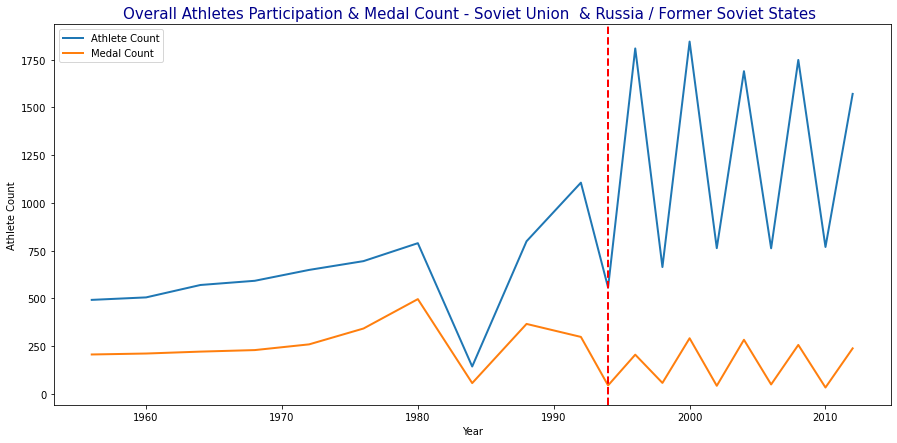

In [64]:
plt.figure(figsize=(15, 7))
#fig, ax = plt.subplots()
sb.lineplot(data=summary_cdf, x="Year", y="Athlete Count",linewidth = 2)
sb.lineplot(data=summary_cdf, x="Year", y="Medal Count",linewidth = 2)
plt.axvline(x=1994, linewidth=2, color='r', ls='--')
plt.legend(["Athlete Count", 'Medal Count'])
#sb.despine(right=True)
plt.title('Overall Athletes Participation & Medal Count - Soviet Union  & Russia / Former Soviet States ', fontsize=15, color='darkblue')

In [65]:
#Impact on participation before and after dissolution

before_dissolution_df = complete_subset_df.loc[(complete_subset_df['Year'] <= 1992)]
after_dissolution_df = complete_subset_df.loc[(complete_subset_df['Year'] > 1992)]

athlete_before = before_dissolution_df.groupby(['Year'])
athlete_count_before =athlete_before['ID'].count()

athlete_after = after_dissolution_df.groupby(['Year'])
athlete_count_after =athlete_after['ID'].count()

print(f'Avg. Athlete participation before dissolution    - {athlete_count_before.mean()}')
print(f'Avg. Athlete participation after dissolution  - {athlete_count_after.mean()}')

# Calculate Independent (Two Sample) t-test
stats.ttest_ind(athlete_count_before, athlete_count_after, equal_var=False)

Avg. Athlete participation before dissolution    - 634.0
Avg. Athlete participation after dissolution  - 1217.9


Ttest_indResult(statistic=-3.0521456646077976, pvalue=0.009594600848049552)

In [66]:
#Impact on medals won before and after dissolution
medal_before_dissolution_df = medal_complete_subset_df.loc[(medal_complete_subset_df['Year'] <= 1992)]
medal_after_dissolution_df = medal_complete_subset_df.loc[(medal_complete_subset_df['Year'] > 1992)]

medals_before = medal_before_dissolution_df.groupby(['Year'])
medals_count_before =medals_before['ID'].count()

medals_after = medal_after_dissolution_df.groupby(['Year'])
medals_count_after =medals_after['ID'].count()

print(f'Avg. Medals won participation before dissolution    - {medals_count_before.mean()}')
print(f'Avg. Medal won participation after dissolution  - {medals_count_after.mean()}')


# Calculate Independent (Two Sample) t-test
stats.ttest_ind(medals_count_before, medals_count_after, equal_var=False)

Avg. Medals won participation before dissolution    - 268.4
Avg. Medal won participation after dissolution  - 149.8


Ttest_indResult(statistic=2.3023267516819583, pvalue=0.03348755898703871)

Complete before and after dissolution- Medal Analysis

# RUSSIA and URS ANALYSIS

In [67]:
#athlete count
grouped_subset_df = subset_df.groupby(['Year','NOC'])
athlete_count = grouped_subset_df['ID'].count()

#Medal Count
medal_subset_df = subset_df.loc[(subset_df['Medal'] != 'No Medal')]
grouped_medal_subset_df = medal_subset_df .groupby(['Year','NOC'])
medal_count = grouped_medal_subset_df['Medal'].count()
#medal_count = grouped_subset_df['Medal'].drop('No Medal').count()

summary_subset_df = pd.DataFrame({'Athlete Count' : athlete_count,
                               'Medal Count' :medal_count})
#summary_subset_df.reset_index()

Text(0.5, 1.0, 'Overall Athletes Participation & Medal Count - Soviet Union & Russia')

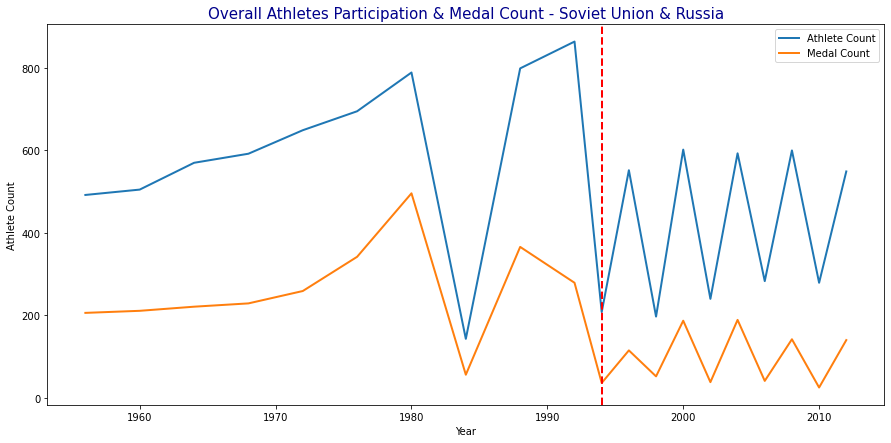

In [68]:
plt.figure(figsize=(15, 7))
sb.lineplot(data=summary_subset_df, x="Year", y="Athlete Count",linewidth = 2)
sb.lineplot(data=summary_subset_df, x="Year", y="Medal Count",linewidth = 2)
plt.axvline(x=1994, linewidth=2, color='r', ls='--')
plt.legend(["Athlete Count", 'Medal Count'])
#sb.despine(right=True)
plt.title('Overall Athletes Participation & Medal Count - Soviet Union & Russia', fontsize=15, color='darkblue')

Text(0.5, 1.0, 'Overall Athletes Participation & Medal count')

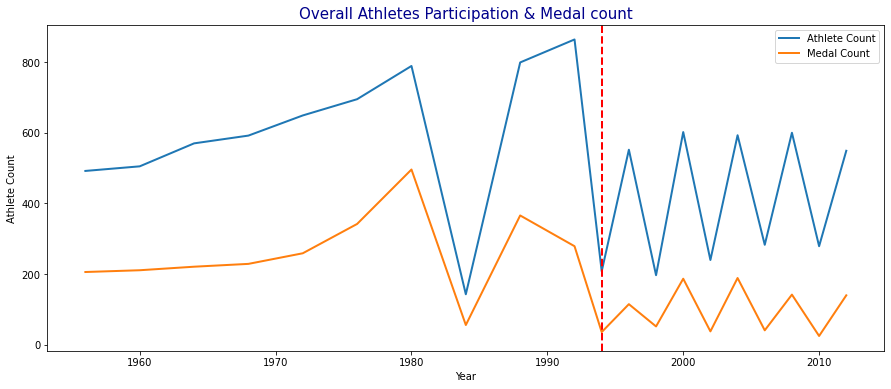

In [70]:
plt.figure(figsize=(15, 6))
#fig, ax = plt.subplots()
sb.lineplot(data=summary_subset_df, x="Year", y="Athlete Count",linewidth = 2)
sb.lineplot(data=summary_subset_df, x="Year", y="Medal Count",linewidth = 2)
plt.axvline(x=1994, linewidth=2, color='r', ls='--')
plt.legend(["Athlete Count", 'Medal Count'])
#sb.despine(right=True)
plt.title('Overall Athletes Participation & Medal count', fontsize=15, color='darkblue')

# Medal Subset

In [71]:
medal_subset_df = subset_df.loc[(subset_df['Medal'] != 'No Medal')]
#USSR Dataset [1966 - 1991]
medal_ussr_df = medal_subset_df.loc[((medal_subset_df['NOC'] == 'URS')|(medal_subset_df['NOC'] == 'EUN')) & (medal_subset_df['Year'] <= 1992)]
# Russia DataSet [1992 - 2014]
medal_russia_df = medal_subset_df.loc[(medal_subset_df['NOC'] == 'RUS') & (medal_subset_df['Year'] > 1992)]

In [72]:
#group by season athlete count
grouped_subset_df = subset_df.groupby(['Year','NOC','Season'])['ID'].count()
#athlete_count = grouped_subset_df['ID'].count()


# Hypothesis Testing


Did the dissolution impact the participation rate of Russia?

In [73]:
#Impact on participation
grouped_ussr_dataset =ussr_df.groupby(['Year','NOC'])
athlete_count_ussr = grouped_ussr_dataset['ID'].count()
#ussr_dataset_df = pd.DataFrame({"Athelete Count-USSR":athlete_count_ussr})


grouped_russia_dataset =russia_df.groupby(['Year','NOC'])
athlete_count_russia = grouped_russia_dataset['ID'].count()
#russia_dataset_df = pd.DataFrame({"Athelete Count-RUSSIA":athlete_count_russia})

grouped_others_dataset =other_countries_df.groupby(['Year','NOC'])
athlete_count_others = grouped_others_dataset['ID'].count()
#others_dataset_df = pd.DataFrame({"Athelete Count-Others":athlete_count_others})

print(f'Avg. Athlete participation in Olympics USSR    - {athlete_count_ussr.mean()}')
print(f'Avg. Athlete participation in Olympics Russia  - {athlete_count_russia.mean()}')
#print(f'Avg. Athlete participation in Olympics Others  - {athlete_count_others.mean()}')

# Calculate Independent (Two Sample) t-test
stats.ttest_ind(athlete_count_ussr, athlete_count_russia, equal_var=False)
#stats.f_oneway(athlete_count_ussr,athlete_count_russia,athlete_count_others )

Avg. Athlete participation in Olympics USSR    - 609.8
Avg. Athlete participation in Olympics Russia  - 410.3


Ttest_indResult(statistic=2.2946607322689987, pvalue=0.034228239137792583)

Did the dissolution impact the total number of medals won in olympics?

In [74]:
#Impact on medals won
grouped_medal_ussr_dataset =medal_ussr_df.groupby(['Year','NOC'])
medal_count_ussr = grouped_medal_ussr_dataset['ID'].count()
medal_ussr_dataset_df = pd.DataFrame({"Athelete Count-USSR":medal_count_ussr})


grouped_medal_russia_dataset =medal_russia_df.groupby(['Year','NOC'])
medal_count_russia = grouped_medal_russia_dataset['ID'].count()
medal_russia_dataset_df = pd.DataFrame({"Athelete Count-RUSSIA":medal_count_russia})



print(f'Avg. Medals won in Olympics USSR  - {medal_count_ussr.mean()}')
print(f'Avg. Medals won in Olympics Russia - {medal_count_russia.mean()}')

# Calculate Independent (Two Sample) t-test
stats.ttest_ind(medal_count_ussr, medal_count_russia, equal_var=False)

Avg. Medals won in Olympics USSR  - 266.5
Avg. Medals won in Olympics Russia - 96.5


Ttest_indResult(statistic=4.015411954907501, pvalue=0.0012583599724577841)

# Athlete Participation

In [33]:
#Athlete participation
athlete_participation = subset_df.groupby(['Year','NOC'])['ID'].count()
athlete_participation

Year  NOC
1956  URS    492
1960  URS    505
1964  URS    570
1968  URS    592
1972  URS    649
1976  URS    695
1980  URS    789
1984  URS    143
1988  URS    799
1992  EUN    864
1994  RUS    208
1996  RUS    552
1998  RUS    197
2000  RUS    602
2002  RUS    240
2004  RUS    593
2006  RUS    283
2008  RUS    600
2010  RUS    279
2012  RUS    549
Name: ID, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


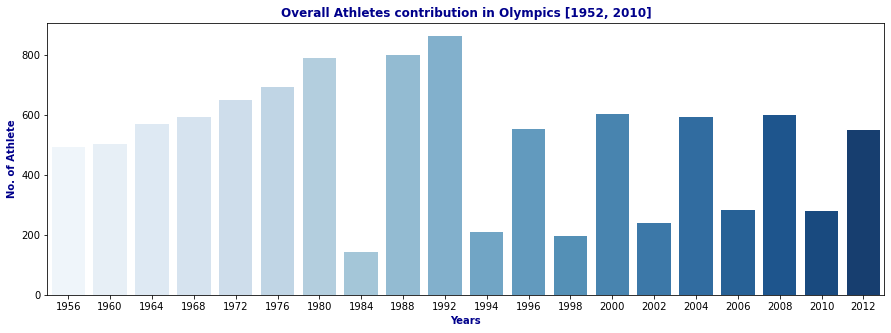

In [34]:
#Athlete Participation of women and men in olympics pre and post cold war (1966-2014)

plt.figure(figsize=(15,5))
#x = subset_df['Year']
#clrs = {"URS": "#273c75", "RUS":"#44bd32","EUN":"#44bd32"}
#clrs = ['blue' if (x < 1992) else 'red' for x in x]
#sb.countplot(subset_df['Year'], palette=clrs)

sb.countplot(subset_df['Year'],palette=sb.color_palette("Blues", 20))
plt.title('Overall Athletes contribution in olympics through time', fontsize=15, color='darkblue')

plt.xlabel('Years', fontweight='bold', color='darkblue')
plt.ylabel('No. of Athlete', fontweight='bold', color='darkblue')
plt.title('Overall Athletes contribution in Olympics [1952, 2010]',fontweight='bold');


# Medal Analysis

In [35]:
data_country_year_df = medal_subset_df.groupby(['Year','NOC'])['Medal'].count()
data_country_year_df 

Year  NOC
1956  URS    206
1960  URS    211
1964  URS    221
1968  URS    229
1972  URS    259
1976  URS    342
1980  URS    496
1984  URS     56
1988  URS    366
1992  EUN    279
1994  RUS     36
1996  RUS    115
1998  RUS     52
2000  RUS    187
2002  RUS     38
2004  RUS    189
2006  RUS     41
2008  RUS    142
2010  RUS     25
2012  RUS    140
Name: Medal, dtype: int64

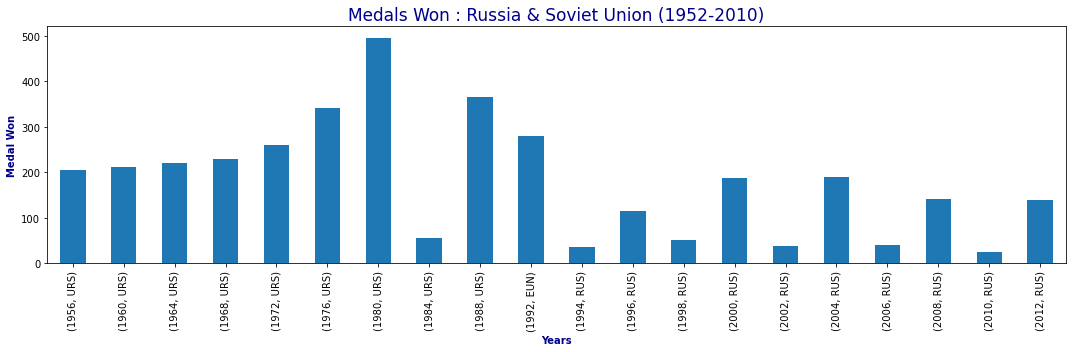

In [36]:
#plot
data_country_year_df.plot.bar(figsize=(15,5))
#colours = {"URS": "#273c75", "RUS":"#44bd32"}
plt.title("Medals Won : Russia & Soviet Union (1952-2010)",fontsize=17, color='darkblue')
plt.xlabel('Years', fontweight='bold', color='darkblue')
plt.ylabel('Medal Won', fontweight='bold', color='darkblue')
#plt.axvline(x=1994, linewidth=2, color='r', ls='--')
plt.tight_layout()
plt.show()

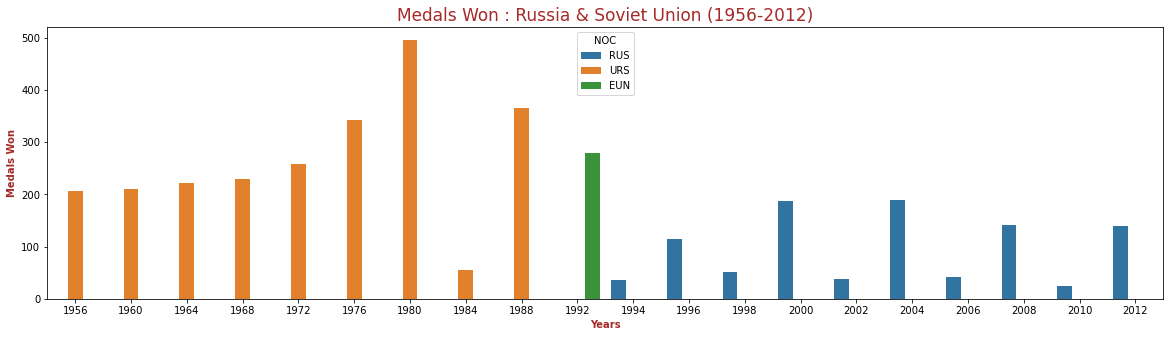

In [37]:
# plot awarded medals through years
plt.figure(figsize=(20, 5))
sb.countplot(data=medal_subset_df, x='Year', hue='NOC')
plt.title("Medals Won : Russia & Soviet Union (1956-2012)", fontsize=17, color='brown')
plt.xlabel('Years', fontweight='bold', color='brown')
plt.ylabel('Medals Won', fontweight='bold', color='brown');

In [38]:
year_country_medal = medal_subset_df.groupby('Year')['Medal'].value_counts()
#year_country_medal

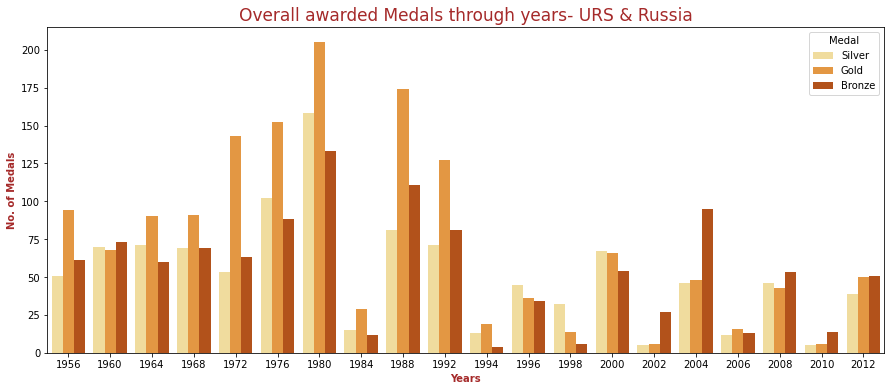

In [52]:
# plot awarded medals through years
plt.figure(figsize=(15, 6))
sb.countplot(data=medal_subset_df, x='Year', hue='Medal', palette=sb.color_palette("YlOrBr", 3))
plt.title('Overall awarded Medals through years- URS & Russia', fontsize=17, color='brown')
plt.xlabel('Years', fontweight='bold', color='brown')
plt.ylabel('No. of Medals', fontweight='bold', color='brown');

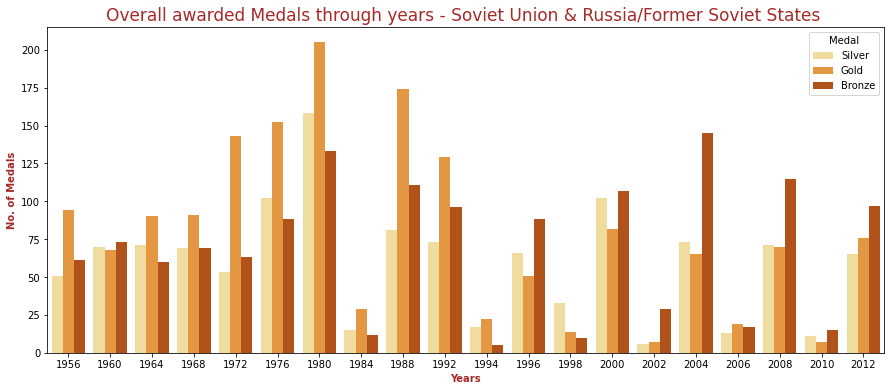

In [51]:
# plot awarded medals through years
plt.figure(figsize=(15, 6))
sb.countplot(data=medal_complete_subset_df, x='Year', hue='Medal', palette=sb.color_palette("YlOrBr", 3))
plt.title('Overall awarded Medals through years - Soviet Union & Russia/Former Soviet States ', fontsize=17, color='brown')
plt.xlabel('Years', fontweight='bold', color='brown')
plt.ylabel('No. of Medals', fontweight='bold', color='brown');

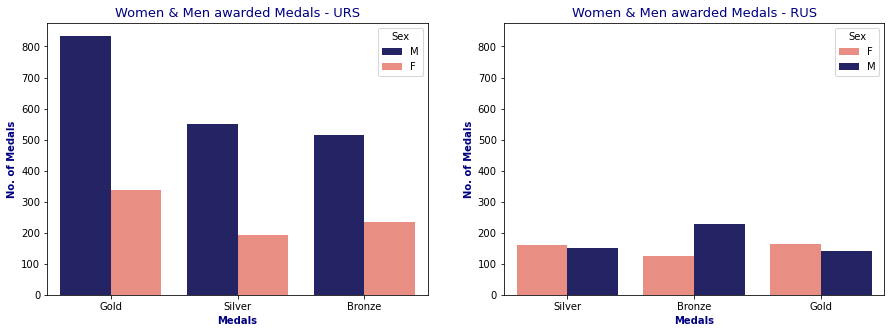

In [59]:
# Contrast between women & men awarded medals post and after coldwar
plt.figure(figsize = [15, 5]) 

# plot Women & Men awarded Medals in before Cold War Olympics
ax1 = plt.subplot(1, 2, 1)
sb.countplot(data=medal_ussr_df, x='Medal', hue='Sex', palette=['midnightblue', 'salmon'])
ax1.set_title('Women & Men awarded Medals - URS', fontsize=13, color='navy')
ax1.set_xlabel('Medals', fontweight='bold', color='navy')
ax1.set_ylabel('No. of Medals', fontweight='bold', color='navy')

# plot Women & Men awarded Medals after Cold War
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
sb.countplot(data=medal_russia_df, x='Medal', hue='Sex', palette=['salmon','midnightblue'])
ax2.set_title('Women & Men awarded Medals - RUS', fontsize=13, color='navy')
ax2.set_xlabel('Medals', fontweight='bold', color='navy')
ax2.set_ylabel('No. of Medals', fontweight='bold', color='navy');


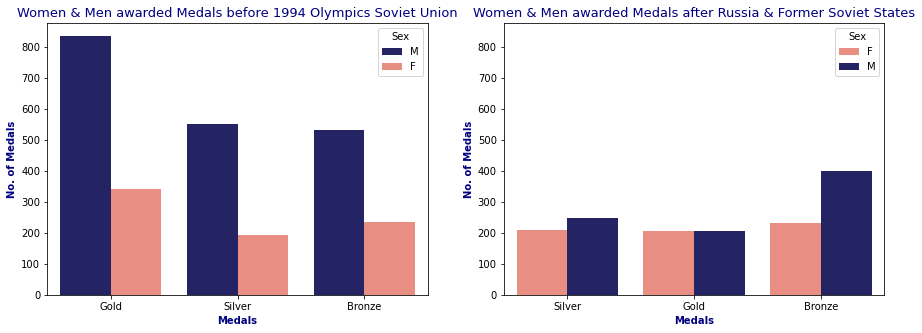

In [60]:
# Contrast between women & men awarded medals post and after coldwar
plt.figure(figsize = [15, 5]) 

# plot Women & Men awarded Medals in before Cold War Olympics
ax1 = plt.subplot(1, 2, 1)
sb.countplot(data=medal_before_dissolution_df, x='Medal', hue='Sex', palette=['midnightblue', 'salmon'])
ax1.set_title('Women & Men awarded Medals before 1994 Olympics Soviet Union', fontsize=13, color='navy')
ax1.set_xlabel('Medals', fontweight='bold', color='navy')
ax1.set_ylabel('No. of Medals', fontweight='bold', color='navy')

# plot Women & Men awarded Medals after Cold War
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
sb.countplot(data=medal_after_dissolution_df, x='Medal', hue='Sex', palette=['salmon','midnightblue'])
ax2.set_title('Women & Men awarded Medals after Russia & Former Soviet States', fontsize=13, color='navy')
ax2.set_xlabel('Medals', fontweight='bold', color='navy')
ax2.set_ylabel('No. of Medals', fontweight='bold', color='navy');
